# Distances

In [55]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from cube_fil_finder.util.moments import ROUNDNESS_AR_CONVERSION as AR2ROUND

%matplotlib inline

In [42]:
matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams.update({'font.size': 12})

In [2]:
data_file_path = '../../data_out/fourth_batch_all_prop.txt'

In [3]:
# all the data fields
keys = ['key_num',
        'ra',
        'dec',
        'l',
        'b',
        'size',
        'roundness',
        'starting_velocity',
        'velocity_span',
        'average_velocity',
        'moment_0_mean',
        'moment_0_median',
        'moment_0_peak',
        'moment_0_mean_raw',
        'moment_0_median_raw',
        'moment_0_peak_raw',
        'moment_1_mean',
        'moment_1_median',
        'moment_2_mean',
        'moment_2_median',
        'moment_2_peak',
        'column_density_mean',
        'column_density_median',
        'column_density_peak',
        'column_density_mean_raw',
        'column_density_median_raw',
        'column_density_peak_raw',
        'width_fit',
        'width_err',
        'width_chisq',
        'width_fit_raw',
        'width_err_raw',
        'width_chisq_raw']

In [4]:
data = np.loadtxt(data_file_path, delimiter=',')

In [5]:
data.shape # 1073 trees (excluding edge cases), 31 fields outlined in keys

(1073, 33)

In [6]:
key_nums = data[:, 0]
ras = data[:, 1]
decs = data[:, 2]
ls = data[:, 3]
bs = data[:, 4]
sizes = data[:, 5]
roundnesses = data[:, 6]
starting_velocities = data[:, 7]
velocity_spans = data[:, 8]
average_velocities = data[:, 9]
moment_0_means = data[:, 10]
moment_0_medians = data[:, 11]
moment_0_peaks = data[:, 12]
moment_0_means_raw = data[:, 13]
moment_0_medians_raw = data[:, 14]
moment_0_peaks_raw = data[:, 15]
moment_1_means = data[:, 16]
moment_1_medians = data[:, 17]
moment_2_means = data[:, 18]
moment_2_medians = data[:, 19]
moment_2_peaks = data[:, 20]
column_density_means = data[:, 21]
column_density_medians = data[:, 22]
column_density_peaks = data[:, 23]
column_density_means_raw = data[:, 24]
column_density_medians_raw = data[:, 25]
column_density_peaks_raw = data[:, 26]
width_fits = data[:, 27]
width_errs = data[:, 28]
width_chisq = data[:, 29]
width_fits_raw = data[:, 30]
width_errs_raw = data[:, 31]
width_chisq_raw = data[:, 32]

### Stilism distance from Susan

In [8]:
stilism_dist_data = np.loadtxt('../../dist_data/fourth_batch_all_prop_corr_lbdistances.txt', delimiter=' ')
stilism_dist = stilism_dist_data[:,2]
stilism_dist_err = stilism_dist_data[:,4]
stilism_lower_lim_flag = stilism_dist_data[:,6]

### Flat rotation curve nearside distance from Josh

In [9]:
flatcurve_dist = np.loadtxt('../../dist_data/fourth_batch_flatcurve_dist.txt', delimiter=',')

### Local condition

In [13]:
v_cut = 10
b_cut = 30

In [14]:
local_idx = (np.abs(moment_1_means) < v_cut) & ((np.abs(bs) > b_cut) | (np.abs(bs) < b_cut) & ((ls < 90) | (ls > 270)))
# (v < 10) AND (b > 30 OR (b < 30 AND not galactic 180))

### Stilism distance for local filaments and flat rot curve nearside distance for others

In [88]:
dist = np.zeros_like(stilism_dist)
dist[local_idx] = stilism_dist[local_idx]
dist[~local_idx] = flatcurve_dist[~local_idx]

In [89]:
dist[dist < 75] = 100
lower_bound_flag = (dist > 9999)

In [90]:
width_fits_raw_dcorr = width_fits_raw * (dist / 100)

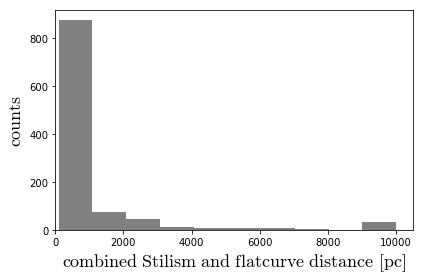

In [81]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.hist(dist, color='grey')
ax.set_xlim(0)
ax.set_ylabel('$\mathrm{counts}$', fontsize=18)
ax.set_xlabel('$\mathrm{combined\ Stilism\ and\ flatcurve\ distance}\ [\mathrm{pc}]$', fontsize=18)
fig.tight_layout()
fig.show()

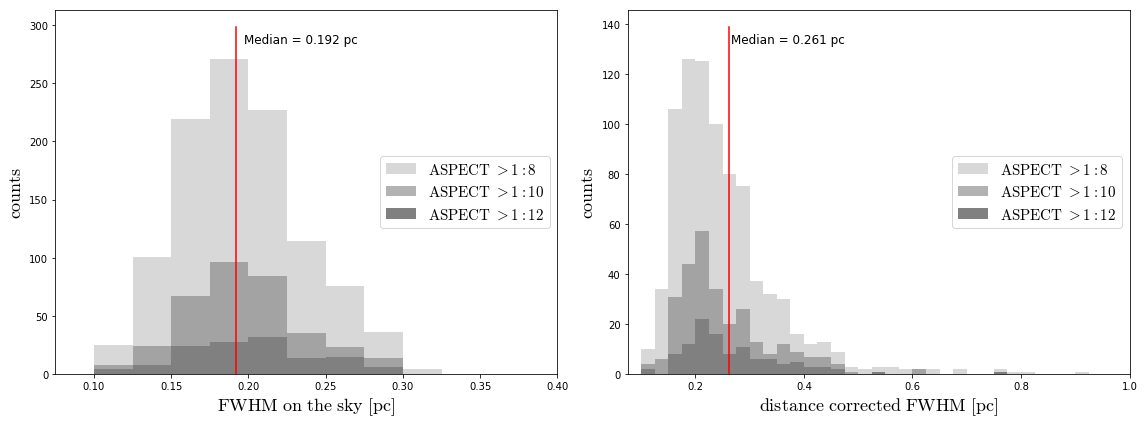

In [69]:
fig_dist_corr, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
ax1, ax2 = axs

idx1 = (roundnesses < AR2ROUND['1_10'])
idx2 = (roundnesses < AR2ROUND['1_12'])

bins1 = np.arange(.1, .4, .025)

n_1_8, _, _ = ax1.hist(width_fits_raw, bins1, color='grey', alpha=.3, label=r'$\mathrm{ASPECT}\ > 1:8$')
_, _, _ = ax1.hist(width_fits_raw[idx1], bins1, color='grey', alpha=.6, label=r'$\mathrm{ASPECT}\ > 1:10$')
_, _, _ = ax1.hist(width_fits_raw[idx2], bins1, color='grey', alpha=1, label=r'$\mathrm{ASPECT}\ > 1:12$')
ax1.legend(loc='center right', fontsize=15)
ax1.plot([np.nanmedian(width_fits_raw), np.nanmedian(width_fits_raw)], [0, max(n_1_8) * 1.1], color='red')
ax1.text(np.nanmedian(width_fits_raw) + .005, max(n_1_8) * 1.05,
         'Median = {0:0.3f} pc'.format(np.nanmedian(width_fits_raw)), fontsize=12)

ax1.set_xlim(0.075, .4)
ax1.set_xlabel(r'$\mathrm{FWHM\ on\ the\ sky\ [pc]}$', fontsize=18)
ax1.set_ylabel(r'$\mathrm{counts}$', fontsize=18)

bins2 = np.arange(.1, 1, .025)

n_1_8, _, _ = ax2.hist(width_fits_raw_dcorr, bins2, color='grey', alpha=.3, label=r'$\mathrm{ASPECT}\ > 1:8$')
_, _, _ = ax2.hist(width_fits_raw_dcorr[idx1], bins2, color='grey', alpha=.6, label=r'$\mathrm{ASPECT}\ > 1:10$')
_, _, _ = ax2.hist(width_fits_raw_dcorr[idx2], bins2, color='grey', alpha=1, label=r'$\mathrm{ASPECT}\ > 1:12$')
ax2.legend(loc='center right', fontsize=15)
ax2.plot([np.nanmedian(width_fits_raw_dcorr), np.nanmedian(width_fits_raw_dcorr)], [0, max(n_1_8) * 1.1], color='red')
ax2.text(np.nanmedian(width_fits_raw_dcorr) + .005, max(n_1_8) * 1.05,
         'Median = {0:0.3f} pc'.format(np.nanmedian(width_fits_raw_dcorr)), fontsize=12)

ax2.set_xlim(0.075, 1)
ax2.set_xlabel(r'$\mathrm{distance\ corrected\ FWHM\ [pc]}$', fontsize=18)
ax2.set_ylabel(r'$\mathrm{counts}$', fontsize=18)

fig_dist_corr.tight_layout()
fig_dist_corr.show()

### only local filaments

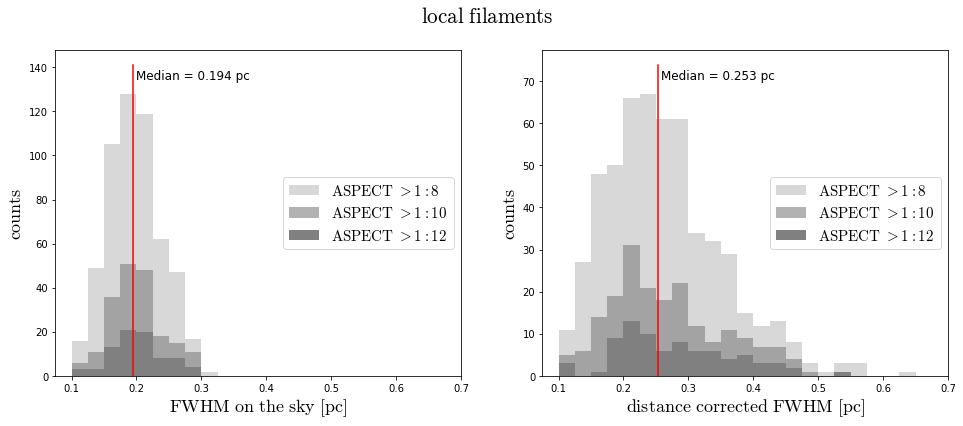

In [99]:
fig_dist_corr_local, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
ax1, ax2 = axs

idx1 = (roundnesses < AR2ROUND['1_10']) & (local_idx == True)
idx2 = (roundnesses < AR2ROUND['1_12']) & (local_idx == True)

bins1 = np.arange(.1, .4, .025)

n_1_8, _, _ = ax1.hist(width_fits_raw[local_idx], bins1, color='grey', alpha=.3, label=r'$\mathrm{ASPECT}\ > 1:8$')
_, _, _ = ax1.hist(width_fits_raw[idx1], bins1, color='grey', alpha=.6, label=r'$\mathrm{ASPECT}\ > 1:10$')
_, _, _ = ax1.hist(width_fits_raw[idx2], bins1, color='grey', alpha=1, label=r'$\mathrm{ASPECT}\ > 1:12$')
ax1.legend(loc='center right', fontsize=15)
ax1.plot([np.nanmedian(width_fits_raw[local_idx]), np.nanmedian(width_fits_raw[local_idx])],
         [0, max(n_1_8) * 1.1], color='red')
ax1.text(np.nanmedian(width_fits_raw[local_idx]) + .005, max(n_1_8) * 1.05,
         'Median = {0:0.3f} pc'.format(np.nanmedian(width_fits_raw[local_idx])), fontsize=12)

ax1.set_xlim(0.075, .7)
ax1.set_xlabel(r'$\mathrm{FWHM\ on\ the\ sky\ [pc]}$', fontsize=18)
ax1.set_ylabel(r'$\mathrm{counts}$', fontsize=18)

width_fits_raw_dcorr = width_fits_raw * (dist / 100)
bins2 = np.arange(.075, 1, .025)

n_1_8, _, _ = ax2.hist(width_fits_raw_dcorr[local_idx], bins2, color='grey', alpha=.3, label=r'$\mathrm{ASPECT}\ > 1:8$')
_, _, _ = ax2.hist(width_fits_raw_dcorr[idx1], bins2, color='grey', alpha=.6, label=r'$\mathrm{ASPECT}\ > 1:10$')
_, _, _ = ax2.hist(width_fits_raw_dcorr[idx2], bins2, color='grey', alpha=1, label=r'$\mathrm{ASPECT}\ > 1:12$')
ax2.legend(loc='center right', fontsize=15)
ax2.plot([np.nanmedian(width_fits_raw_dcorr[local_idx]), np.nanmedian(width_fits_raw_dcorr[local_idx])],
         [0, max(n_1_8) * 1.1], color='red')
ax2.text(np.nanmedian(width_fits_raw_dcorr[local_idx]) + .005, max(n_1_8) * 1.05,
         'Median = {0:0.3f} pc'.format(np.nanmedian(width_fits_raw_dcorr[local_idx])), fontsize=12)

ax2.set_xlim(0.075, .7)
ax2.set_xlabel(r'$\mathrm{distance\ corrected\ FWHM\ [pc]}$', fontsize=18)
ax2.set_ylabel(r'$\mathrm{counts}$', fontsize=18)

fig_dist_corr_local.suptitle('$\mathrm{local\ filaments}$', fontsize=21)

#fig_dist_corr.tight_layout()
fig_dist_corr_local.show()

In [100]:
fig_dist_corr_local.savefig('../../vis/all_sky_maps_fourth_batch/FWHM_hist_dcorr_local.pdf')

In [101]:
max(width_fits_raw_dcorr)

29.753486553826338